# Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('/content/Updated_Netflix_titles.csv')
print(len(df))
df.head()

2000


,id,title,type,description,release_year,age_certification,runtime,genres,imdb_id,imdb_score
0,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,[],tt12635254,9.6
1,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'crime', 'thriller']",tt0903747,9.5
2,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,['reality'],tt3062514,9.5
3,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,['documentation'],tt9253866,9.3
4,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"['scifi', 'animation', 'action', 'family', 'fa...",tt0417299,9.3


In [ ]:
certification_18 = "R"

df['age_certification'].fillna(certification_18, inplace=True)

df['description'].fillna('', inplace=True)

short_threshold = 60
medium_threshold = 120

def classify_runtime(runtime):
    if pd.isna(runtime):
        return 'unknown'
    elif runtime <= short_threshold:
        return 'short'
    elif runtime <= medium_threshold:
        return 'medium'
    else:
        return 'long'

df['length'] = df['runtime'].apply(classify_runtime)


In [ ]:
def is_plus_16(certification):
    plus_16_ratings = ['R', 'NC-17', 'TV-MA', 'TV-14', 'PG-13']
    if certification in plus_16_ratings:
        return '+18'
    else:
        return '-18'

df['age_certification'] = df['age_certification'].apply(is_plus_16)

In [ ]:
# Get the summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()


id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
genres               0
imdb_id              0
imdb_score           0
emotions             0
length               0
dtype: int64

In [ ]:
import ast
df['genres'] = df['genres'].apply(ast.literal_eval)
df['emotions'] = df['emotions'].apply(ast.literal_eval)


In [ ]:
print(type(df['emotions'][0]))
print(type(df['genres'][0]))

<class 'list'>
<class 'list'>


In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,imdb_id,imdb_score,emotions,length
0,tm1175333,The Loyola Project,MOVIE,"In 1963, at the height of the civil rights mov...",2022,+18,88,[documentation],tt17886914,9.4,"[Surprise, Sadness]",medium
1,ts107506,Orangutan Jungle School,SHOW,Heartwarming stories from the largest animal r...,2018,-18,48,[documentation],tt8917574,9.4,"[Surprise, Sadness]",short
2,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,-18,24,"[scifi, family, fantasy, animation, action]",tt0417299,9.3,"[Surprise, Anger, Happiness, Tension, Nostalgi...",short
3,tm155580,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,+18,175,"[drama, crime]",tt0068646,9.2,"[Frustration, Sadness, Tension]",long
4,ts22109,The Twilight Zone,SHOW,A series of unrelated stories containing drama...,1959,-18,28,"[scifi, drama, fantasy, horror, thriller]",tt0052520,9.1,"[Surprise, Fear, Excitement, Frustration, Tens...",short


In [ ]:
"""
def list_to_string(lst):
    if not lst:
        return ""
    return " ".join(lst)

categorical_data['genres'] = categorical_data['genres'].apply(list_to_string)
categorical_data['emotions'] = categorical_data['emotions'].apply(list_to_string)
"""

'\ndef list_to_string(lst):\n    if not lst:\n        return ""\n    return " ".join(lst)\n\ncategorical_data[\'genres\'] = categorical_data[\'genres\'].apply(list_to_string)\ncategorical_data[\'emotions\'] = categorical_data[\'emotions\'].apply(list_to_string)\n'

In [ ]:
"""
columns_to_convert = ['type', 'description', 'genres', 'emotions','length']

df[columns_to_convert] = df[columns_to_convert].astype(str)
"""

"\ncolumns_to_convert = ['type', 'description', 'genres', 'emotions','length']\n\ndf[columns_to_convert] = df[columns_to_convert].astype(str)\n"

In [ ]:
print(len(df))

2000


In [ ]:
for i in range(len(df)):
  if len(df['genres'].iloc[i])==0:
    print(df['title'].iloc[i])

Ol Pejeta Diaries
Amazing Dogs
Over Australia
Bob the Builder: When Bob Became a Builder
Shark Squad
Rise of the Supercarrier
Attack and Defend
Mickey the Great
Sunny
Dragging the Classics: The Brady Bunch


In [ ]:
df = df[df['genres'].apply(lambda x: len(x) > 0)]

In [ ]:
print(len(df))

1990


In [ ]:
for i in range(len(df)):
  if len(df['emotions'].iloc[i])==0:
    print(df['title'].iloc[i])

In [ ]:
for i in range(len(df)):
  if len(df['type'].iloc[i])==0:
    print(df['title'].iloc[i])

In [ ]:
for i in range(len(df)):
  if len(df['length'].iloc[i])==0:
    print(df['title'].iloc[i])

In [ ]:
for i in range(len(df)):
  if len(df['description'].iloc[i])==0:
    print(df['title'].iloc[i])

America's Wild Borders
Great Snakes


In [ ]:
df = df[df['description'].apply(lambda x: len(x) > 0)]

In [ ]:
print(len(df))

1988


In [ ]:
flattened_genres = df['type'].explode()

# Extract unique genres
unique_genres = flattened_genres.unique()

print(unique_genres)

['MOVIE' 'SHOW']


In [ ]:
flattened_genres = df['release_year'].explode()

# Extract unique genres
unique_genres = list(flattened_genres.unique())
unique_genres=sorted(unique_genres)
print(unique_genres)

[1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
flattened_genres = df['age_certification'].explode()

# Extract unique genres
unique_genres = list(flattened_genres.unique())
#unique_genres=sorted(unique_genres)
print(unique_genres)

['+18', '-18']


# Extract keywords

In [ ]:
pip install nltk scikit-learn rake-nltk


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from rake_nltk import Rake

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    """Preprocess the input text by tokenizing, removing stopwords, and lemmatizing."""
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def extract_keywords(text):
    """Extract keywords from the input text using TF-IDF and RAKE methods."""
    tokens = preprocess_text(text)

    preprocessed_text = ' '.join(tokens)

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform([preprocessed_text])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    tfidf_keywords = {feature_names[i]: tfidf_scores[i] for i in range(len(feature_names))}
    sorted_tfidf_keywords = sorted(tfidf_keywords.items(), key=lambda x: x[1], reverse=True)
    top_tfidf_keywords = [word for word, score in sorted_tfidf_keywords[:5]]  # Top 5 keywords

    rake_nltk_var = Rake()
    rake_nltk_var.extract_keywords_from_text(text)
    rake_keywords = rake_nltk_var.get_ranked_phrases_with_scores()
    top_rake_keywords = [keyword for score, keyword in rake_keywords[:5]]  # Top 5 keywords

    combined_keywords = set(top_tfidf_keywords + top_rake_keywords)

    return list(combined_keywords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(df['description'].iloc[2])
movie_description = df['description'].iloc[2]

keywords = extract_keywords(movie_description)
print(keywords)


A TV show devoted to help young people to be mature in their faith, work & knowledge
['knowledge', 'help young people', 'faith', 'help', 'devoted', 'tv show devoted', 'work', 'mature']


In [ ]:
for i in range(len(df)):
  df['description'].iloc[i]=extract_keywords(df['description'].iloc[i])

Streaming output truncated to the last 5000 lines.
<ipython-input-126-32f903359511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'].iloc[i]=extract_keywords(df['description'].iloc[i])
<ipython-input-126-32f903359511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'].iloc[i]=extract_keywords(df['description'].iloc[i])
<ipython-input-126-32f903359511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,imdb_id,imdb_score,emotions,length
0,ts265844,#ABtalks,SHOW,"[bukhash, showcasing, athlete, celebrity, abta...",2018,TV-PG,68,"[reality, documentation]",tt12635254,9.6,"[Surprise, Frustration, Sadness]",medium
1,ts4,Breaking Bad,SHOW,"[new mexico chemistry teacher, walter white, c...",2008,TV-MA,48,"[drama, crime, thriller]",tt0903747,9.5,"[Fear, Frustration, Sadness, Tension]",short
2,ts160526,Khawatir,SHOW,"[knowledge, help young people, faith, help, de...",2005,TV-14,19,[reality],tt3062514,9.5,"[Surprise, Frustration]",short
3,ts85398,Our Planet,SHOW,"[spectacular scope, ambitious documentary, cre...",2019,TV-G,50,[documentation],tt9253866,9.3,"[Surprise, Sadness]",short
4,ts3371,Avatar: The Last Airbender,SHOW,"[young boy reawakens, avatar, boy, dangerous, ...",2005,TV-Y7,24,"[scifi, animation, action, family, fantasy]",tt0417299,9.3,"[Surprise, Anger, Happiness, Tension, Nostalgi...",short


# Transformer T5

In [ ]:
"""
import pandas as pd

df = pd.read_hdf('/content/Netflix_embedding.h5', key='df')
"""

"\nimport pandas as pd\n\ndf = pd.read_hdf('/content/Netflix_embedding.h5', key='df')\n"

In [ ]:
print(type(df['emotions'].iloc[0]))

<class 'list'>


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
"""
def get_embedding(sentence):
    # Tokenize the sentence
    encoded_input = tokenizer(sentence, return_tensors='pt')

    with torch.no_grad():
        output = model(
            input_ids=encoded_input["input_ids"],
            attention_mask=encoded_input["attention_mask"],
            return_dict=True
        )

    emb = output.last_hidden_state

    mean_emb = emb.mean(dim=1)
    return mean_emb
"""

'\ndef get_embedding(sentence):\n    # Tokenize the sentence\n    encoded_input = tokenizer(sentence, return_tensors=\'pt\')\n\n    with torch.no_grad():\n        output = model(\n            input_ids=encoded_input["input_ids"],\n            attention_mask=encoded_input["attention_mask"],\n            return_dict=True\n        )\n\n    emb = output.last_hidden_state\n\n    mean_emb = emb.mean(dim=1)\n    return mean_emb\n'

In [ ]:
def get_embedding(text):
    if isinstance(text, list):
        embeddings = []
        for word in text:
            encoded_input = tokenizer(word, return_tensors='pt')
            with torch.no_grad():
                output = model(
                    input_ids=encoded_input["input_ids"],
                    attention_mask=encoded_input["attention_mask"],
                    return_dict=True
                )
            word_embedding = output.last_hidden_state[:, 0, :]
            embeddings.append(word_embedding)

        mean_emb = torch.mean(torch.stack(embeddings), dim=0)
        return mean_emb
    else:
        encoded_input = tokenizer(text, return_tensors='pt')
        with torch.no_grad():
            output = model(
                input_ids=encoded_input["input_ids"],
                attention_mask=encoded_input["attention_mask"],
                return_dict=True
            )
        mean_emb = output.last_hidden_state.mean(dim=1)
        return mean_emb

In [ ]:
def generate_feature_embeddings(df, features):
    for feature in features:
        df[f'{feature}_embedding'] = df[feature].apply(lambda x: get_embedding(x))
    return df

features = ['genres', 'emotions','length']

df_with_embeddings = generate_feature_embeddings(df, features)

In [ ]:
import torch

def weighted_average_embeddings(df, feature_columns, weights):
    combined_embeddings = []
    for index, row in df.iterrows():
        weighted_sum_embedding = torch.zeros_like(torch.tensor(row[feature_columns[0]]))
        for feature, weight in zip(feature_columns, weights):
            weighted_sum_embedding += torch.tensor(row[feature]) * weight
        combined_embeddings.append(weighted_sum_embedding)
    df['combined_embedding'] = combined_embeddings
    return df

embedding_columns = ['genres_embedding', 'emotions_embedding', 'length_embedding']
weights = [0.7, 0.1, 0.2]

df_with_embeddings1 = weighted_average_embeddings(df_with_embeddings, embedding_columns, weights)


<ipython-input-269-1c34aa1b5cfa>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weighted_sum_embedding = torch.zeros_like(torch.tensor(row[feature_columns[0]]))
<ipython-input-269-1c34aa1b5cfa>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weighted_sum_embedding += torch.tensor(row[feature]) * weight


In [ ]:
#df_with_embeddings1.to_hdf('Netflix_embedding1.h5', key='df', mode='w')

In [ ]:
fdf = df_with_embeddings1[['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'imdb_id', 'imdb_score',
       'emotions', 'length','combined_embedding']]


In [ ]:
fdf.to_hdf('Netflix_embedding.h5', key='df', mode='w')

<ipython-input-272-95b733723bfc>:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['id', 'title', 'type', 'description', 'age_certification', 'genres',
       'imdb_id', 'emotions', 'length', 'combined_embedding'],
      dtype='object')]

  fdf.to_hdf('Paramount_embedding.h5', key='df', mode='w')


# Testing

In [ ]:
import pandas as pd
import numpy as np
import torch
import json

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
weights = [0.7, 0.1, 0.2]


In [ ]:
def find_top_movies(df, input, top_n=3):
    input_embedding= torch.zeros_like(torch.tensor(df['combined_embedding'].iloc[0]))
    i=0
    for key,value in input.items():
      input_embedding+=get_embedding(value)*weights[i]
      i+=1

    df['cosine_similarity'] = df['combined_embedding'].apply(lambda x: cosine_similarity(x.reshape(1, -1), input_embedding)[0][0])

    top_50_movies = df.nlargest(5, 'cosine_similarity')

    top_50_movies_sorted = top_50_movies.sort_values(by='imdb_score', ascending=False)
    final_top_movies = top_50_movies_sorted.head(top_n)

    return final_top_movies

input = {'genres':['music','romance'],'emotions':['Nostalgia'],'length':'long'}
top_movies = find_top_movies(fdf, input, top_n=3)
for i in range(len(top_movies)):
  print(top_movies['genres'].iloc[i])
print(top_movies[['title', 'type','description', 'genres', 'emotions','length','imdb_score', 'cosine_similarity']])

<ipython-input-166-6d88cc5cb072>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_embedding= torch.zeros_like(torch.tensor(df['combined_embedding'].iloc[0]))


['action', 'scifi', 'music', 'thriller']
['reality', 'music']
['drama', 'family', 'music', 'documentation']
                               title   type  \
27                         Inception  MOVIE   
884                    Rhythm + Flow   SHOW   
1179  One Day We'll Talk About Today  MOVIE   

                                            description  \
27    Cobb, a skilled thief who commits corporate es...   
884   In this music competition show, judges Tip “T....   
1179  Three siblings live in happy-looking families,...   

                                     genres  \
27         [action, scifi, music, thriller]   
884                        [reality, music]   
1179  [drama, family, music, documentation]   

                                               emotions length  imdb_score  \
27    [Fear, Anger, Happiness, Tension, Nostalgia, E...   long         8.8   
884       [Surprise, Frustration, Nostalgia, Happiness]  short         7.6   
1179  [Surprise, Happiness, Tension, Nostal

<ipython-input-166-6d88cc5cb072>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosine_similarity'] = df['combined_embedding'].apply(lambda x: cosine_similarity(x.reshape(1, -1), input_embedding)[0][0])


# Validation

In [ ]:
import pandas as pd

# Load DataFrame from HDF5
file_path = 'embeddings.h5'
df = pd.read_hdf(file_path, key='df')

print("Loaded DataFrame:")
print(df.head())
print(df.columns)


Loaded DataFrame:
                                 title   type  \
0  Five Came Back: The Reference Films   SHOW   
1                          Taxi Driver  MOVIE   
2                          Deliverance  MOVIE   
3      Monty Python and the Holy Grail  MOVIE   
4                      The Dirty Dozen  MOVIE   

                                         description  \
0  This collection includes 12 World War II-era p...   
1  A mentally unstable Vietnam War veteran works ...   
2  Intent on seeing the Cahulawassee River before...   
3  King Arthur, accompanied by his squire, recrui...   
4  12 American military prisoners in World War II...   

                           genres  \
0                   documentation   
1                     drama crime   
2  drama action thriller european   
3           fantasy action comedy   
4                      war action   

                                            emotions  \
0                                  Tension Nostalgia   
1              

In [ ]:
import numpy as np

# Extract embeddings from DataFrame
type_embeddings = np.array([np.array(x) for x in df['type_embedding']])
description_embeddings = np.array([np.array(x) for x in df['description_embedding']])
genres_embeddings = np.array([np.array(x) for x in df['genres_embedding']])
emotions_embeddings = np.array([np.array(x) for x in df['emotions_embedding']])
combined_embeddings = np.array([np.array(x) for x in df['combined_embedding']])

# Inspect dimensions and basic statistics
print(f"Type Embeddings Shape: {type_embeddings.shape}")
print(f"Description Embeddings Shape: {description_embeddings.shape}")
print(f"Genres Embeddings Shape: {genres_embeddings.shape}")
print(f"Emotions Embeddings Shape: {emotions_embeddings.shape}")
print(f"Combined Embeddings Shape: {combined_embeddings.shape}")
print(f"Combined Embeddings Mean: {np.mean(combined_embeddings, axis=0)}")
print(f"Combined Embeddings Std Dev: {np.std(combined_embeddings, axis=0)}")


Type Embeddings Shape: (5850, 1, 512)
Description Embeddings Shape: (5850, 1, 512)
Genres Embeddings Shape: (5850, 1, 512)
Emotions Embeddings Shape: (5850, 1, 512)
Combined Embeddings Shape: (5850, 1, 512)
Combined Embeddings Mean: [[-1.62716918e-02 -6.07311912e-03 -3.80622083e-03 -7.30621517e-02
  -3.05414125e-02 -2.85415500e-02  4.77497689e-02 -2.01100111e-02
  -1.32753402e-01  8.05456564e-03  2.89779785e-03  7.02987462e-02
  -5.56568848e-03 -2.74630776e-03  2.50912970e-03  1.93035621e-02
  -7.98861205e-04 -3.82969826e-02  2.18303129e-02  4.57641594e-02
   4.07511778e-02  4.14610431e-02 -7.39211170e-03 -4.67067510e-02
  -2.53700092e-02 -4.56700809e-02 -2.71808822e-02 -7.17959255e-02
  -4.78457510e-02 -1.78974658e-01  1.61012392e-02  5.59924021e-02
  -3.64248417e-02 -1.39163407e-02 -8.69793724e-03 -5.80199510e-02
   1.10994084e-02  6.44564480e-02  3.86188962e-02 -2.04140767e-02
  -3.84693258e-02 -2.61862576e-02  1.26822323e-01 -1.29252493e-01
   1.30572289e-01  3.05523220e-02  3.0052

In [ ]:
# Ensure each embedding is flattened properly
type_embeddings = np.array([np.array(x).flatten() for x in df['type_embedding']])
description_embeddings = np.array([np.array(x).flatten() for x in df['description_embedding']])
genres_embeddings = np.array([np.array(x).flatten() for x in df['genres_embedding']])
emotions_embeddings = np.array([np.array(x).flatten() for x in df['emotions_embedding']])
combined_embeddings = np.array([np.array(x).flatten() for x in df['combined_embedding']])

# Check the shape of the flattened embeddings
print(f"Type Embeddings Shape: {type_embeddings.shape}")
print(f"Description Embeddings Shape: {description_embeddings.shape}")
print(f"Genres Embeddings Shape: {genres_embeddings.shape}")
print(f"Emotions Embeddings Shape: {emotions_embeddings.shape}")
print(f"Combined Embeddings Shape: {combined_embeddings.shape}")


Type Embeddings Shape: (5850, 512)
Description Embeddings Shape: (5850, 512)
Genres Embeddings Shape: (5850, 512)
Emotions Embeddings Shape: (5850, 512)
Combined Embeddings Shape: (5850, 512)


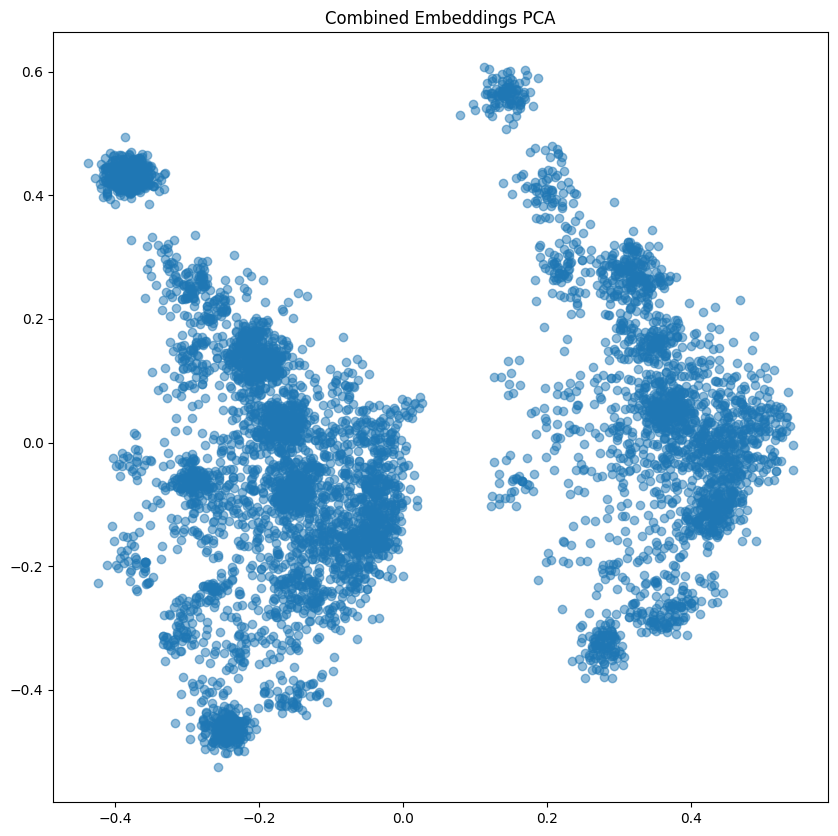

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings(embeddings, title):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
    plt.title(title)
    plt.show()

visualize_embeddings(combined_embeddings, 'Combined Embeddings PCA')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


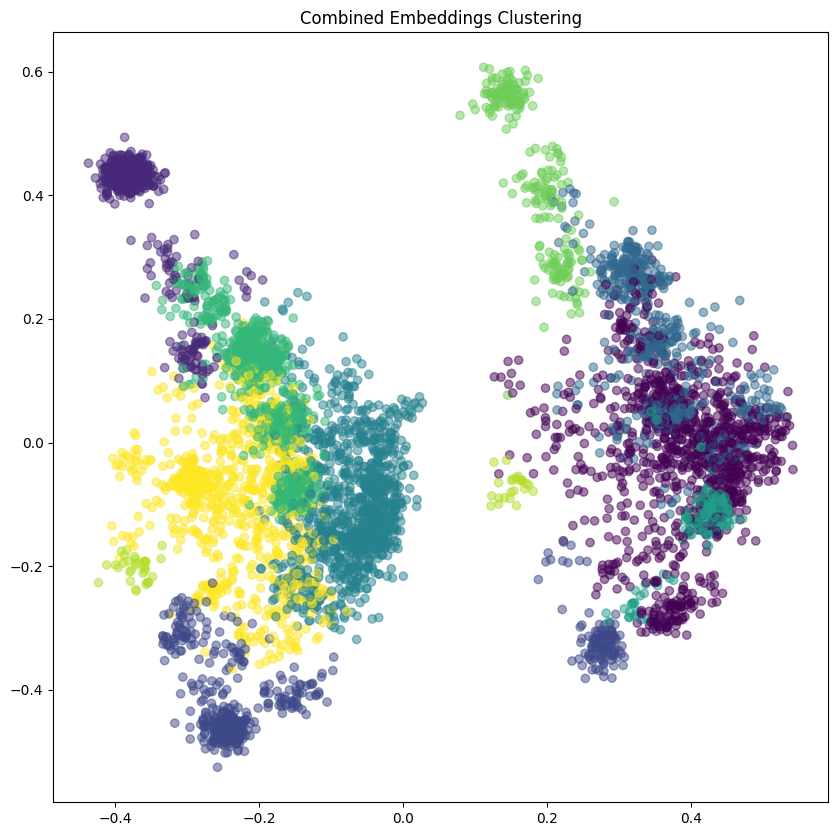

In [ ]:
from sklearn.cluster import KMeans

def plot_clusters(embeddings, title):
    kmeans = KMeans(n_clusters=10, random_state=0)
    clusters = kmeans.fit_predict(embeddings)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.show()

plot_clusters(combined_embeddings, 'Combined Embeddings Clustering')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def check_similarity(embeddings, index1, index2):
    similarity = cosine_similarity(embeddings[index1].reshape(1, -1), embeddings[index2].reshape(1, -1))
    print(f"Cosine Similarity between {index1} and {index2}: {similarity[0][0]}")

# Check similarity between two movies
check_similarity(combined_embeddings, 0, 1)


Cosine Similarity between 0 and 1: 0.7901609539985657


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 5  # Example value, adjust based on your data
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(combined_embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Inertia: 1181.5390625


In [ ]:
silhouette_avg = silhouette_score(combined_embeddings, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2226356565952301


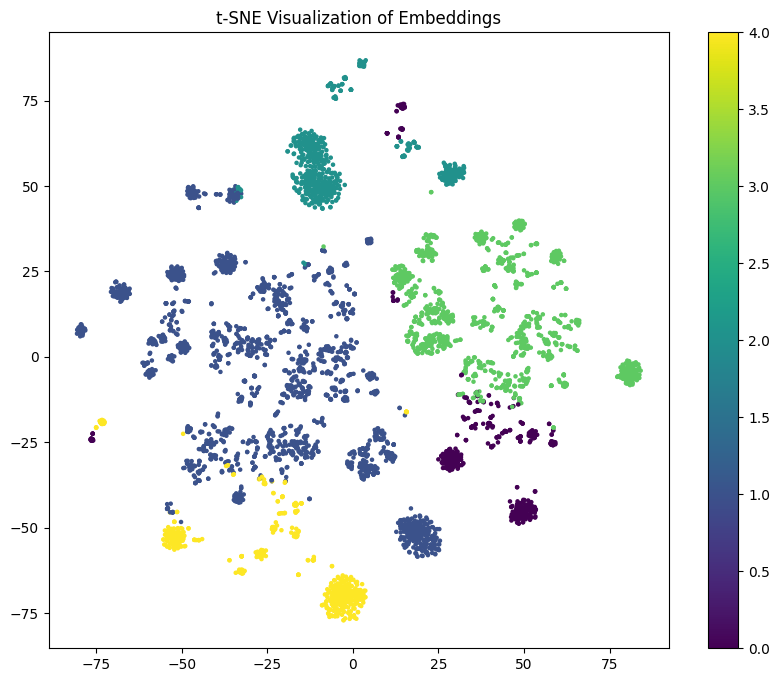

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.colorbar()
plt.title("t-SNE Visualization of Embeddings")
plt.show()
